# Data Understanding

In this notebook, we will perform initial data understanding and visualizations to understand the dataset better.  

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set visualization style
sns.set_theme(style="whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

# I. Data daily

In [4]:
# Load the dataset
df_daily = pd.read_excel(r"../data/raw/hanoi_daily.xlsx")

# Hiển thị thông tin cơ bản
print("Kích thước dữ liệu:", df_daily.shape)
display(df_daily.head())

Kích thước dữ liệu: (3927, 33)


,name,datetime,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,precip,precipprob,precipcover,preciptype,snow,snowdepth,windgust,windspeed,winddir,sealevelpressure,cloudcover,visibility,solarradiation,solarenergy,uvindex,severerisk,sunrise,sunset,moonphase,conditions,description,icon,stations
0,Hanoi,2015-01-01,24.0,11.4,17.7,24.0,11.4,17.7,9.4,63.8,0.0,0,0.0,NaN,0,0,25.2,13.0,78.3,1023.4,0.4,7.2,197.4,17.1,7,NaN,2015-01-01T06:33:34,2015-01-01T17:26:18,0.36,Clear,Clear conditions throughout the day.,clear-day,"48820099999,48823099999,48825099999,4883109999..."
1,Hanoi,2015-01-02,22.0,11.0,16.3,22.0,11.0,16.3,9.4,65.6,0.0,0,0.0,NaN,0,0,23.4,13.9,99.8,1022.7,28.3,7.7,187.6,16.2,7,NaN,2015-01-02T06:33:53,2015-01-02T17:26:56,0.39,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"48820099999,48823099999,48825099999,4883109999..."
2,Hanoi,2015-01-03,21.0,13.1,17.0,21.0,13.1,17.0,12.4,75.6,0.0,0,0.0,NaN,0,0,21.6,13.0,97.0,1020.0,42.0,6.0,115.5,9.9,4,NaN,2015-01-03T06:34:11,2015-01-03T17:27:34,0.43,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"48820099999,48823099999,48825099999,4883109999..."
3,Hanoi,2015-01-04,22.6,16.9,19.3,22.6,16.9,19.3,16.1,82.0,0.6,100,25.0,rain,0,0,25.2,17.2,98.7,1013.5,88.0,6.3,64.3,5.6,3,NaN,2015-01-04T06:34:28,2015-01-04T17:28:12,0.46,"Rain, Partially cloudy",Partly cloudy throughout the day with a chance...,rain,"48820099999,48823099999,48825099999,4883109999..."
4,Hanoi,2015-01-05,23.0,18.5,20.4,23.0,18.5,20.4,18.4,88.4,0.0,0,0.0,NaN,0,0,19.1,13.0,85.7,1011.2,90.6,4.2,93.7,7.9,4,NaN,2015-01-05T06:34:44,2015-01-05T17:28:51,0.50,Overcast,Cloudy skies throughout the day.,cloudy,"48820099999,48823099999,48825099999,4883109999..."


# Giải thích ý nghĩa các cột

| Key | Meaning explanation | General description | Conclusion |
|------|----------------------|---------------------|-------------|
| name | Measurement station/location  | Hà Nội | All data from Hanoi; urban effects like heat retention may influence temperature |
| datetime | Date of record | Daily timestamps from Jan–Mar 2015 | Captures temporal trends, seasonality; can extract month, day, week features |
| tempmax | Maximum daily temperature | Highest temperature recorded each day | Indicates daytime heating intensity; peaks highlight warm periods |
| tempmin | Minimum daily temperature | Lowest temperature recorded each day | Indicates nighttime cooling; smaller difference with tempmax shows heat retention |
| temp | Average daily temperature | Mean of daily temperatures | Stable daily indicator; reflects general warmth and seasonal increase |
| feelslikemax | Maximum apparent temperature | “Feels like” daytime temperature | Often same as tempmax in dry periods, higher in humid conditions; shows human perceived heat |
| feelslikemin | Minimum apparent temperature | “Feels like” nighttime temperature | Similar to tempmin but accounts for humidity; indicates nighttime comfort |
| feelslike | Average apparent temperature | Daily mean of apparent temperature | Represents overall human thermal comfort; slightly higher than temp in humid days |
| dew | Dew point | Temperature at which air saturates | Indicates absolute humidity, higher dew points means warmer nights |
| humidity | Relative humidity | % water vapor | Modulates perceived temperature; high humidity increases apparent heat and reduces night cooling |
| precip | Accumulated precipitation — mm | Total rainfall accumulated (hourly/daily). Rain cools by shading and evaporation; leaves higher humidity afterwards. | Causes short-term cooling during/just after rain, but raises humidity and Heat Index later; useful with temp/tempmax to estimate daily RH and perceived heat. |
| precipprob | Probability of precipitation — % | Forecast probability of precipitation for the period. High probability usually implies cloudier, wetter conditions. | Higher precip probability tends to reduce daytime maximums (less sun) but increases humidity and perceived discomfort; if rain does not occur, effect is weaker. |
| precipcover | Precipitation coverage — % | Fraction of time period with precipitation (how long it rains during the day). | Large coverage limits daytime heating and lowers peak temperatures but keeps humidity high (can make conditions feel more oppressive); scattered short rain has smaller cooling effect. |
| preciptype | Precipitation type (e.g., 'rain','snow') | Type of falling precipitation. Different types imply different thermodynamic regimes (convective rain vs drizzle vs snow). | Type matters: convective rain gives strong short cooling; drizzle/mist sustains humidity and cools less; snow indicates very cold air and has strong surface-albedo effects (rare in Hanoi). |
| snow | Daily snowfall amount — mm | Amount of snow that fell during the day. | Practically negligible for Hanoi; when present, indicates very cold air and suppresses daytime warming via albedo. |
| snowdepth | Snow depth on ground — mm | Depth of snow on the surface. | Not relevant for Hanoi in normal conditions; where present, deep snow increases daytime reflectivity and keeps temperatures lower, especially daytime. |
| windgust | Maximum wind gust — km/h or m/s | Peak instantaneous wind speed observed during the period. | Gusts often accompany storms and can rapidly cool surface air (downdrafts); strong gusts also mix the boundary layer, affecting short-term temperature changes. |
| windspeed | Average wind speed — km/h or m/s | Mean wind speed over the period. Influences evaporative cooling and boundary-layer mixing. | Higher mean wind improves sensible cooling (feels cooler), reduces night-time cold pooling; low wind with high humidity increases perceived heat. |
| winddir | Wind direction — degrees (0 = North) | Direction from which the wind is blowing; indicates air mass source (marine vs continental). | Determines air-mass type: sea-breeze directions (E/SE) bring cooler, moist air; continental/warm directions (W/SW) can bring drier, hotter conditions; seasonal wind direction changes drive temperature regime. |
| sealevelpressure | Average sea level pressure | Reflects large-scale high/low-pressure systems. | When pressure is low, the weather is often cloudy or rainy and cooler. When pressure is high, the sky is usually clear and the temperature tends to be warmer during the day but cooler at night.|
| cloudcover | Cloud cover (percentage of the sky covered by clouds) | Indicates sunlight blockage. | More clouds reduce daytime temperature but keep nights warmer, creating a strong difference between day and night temperatures. |
| visibility | Average visibility | Affected by fog, haze, or rain. | Poor visibility limits sunlight reaching the ground, slowing daytime heating and leading to cooler days. |
| solarradiation | Average solar radiation | Amount of sunlight reaching surface. | Higher solar radiation increases daytime temperature.|
| solarenergy | Accumulated solar energy | Total daily sunlight energy. | Greater solar energy leads to a higher daily average temperature.|
| uvindex | Maximum UV Index (Ultraviolet Index) |Intensity of sunlight (UV part).  | A high UV index usually means clear skies and hot sunny weather. |
| severerisk | Severe weather risk (Assessment index) | Indicates storms or heavy rain. | When this risk is high, stormy or rainy conditions can quickly lower the temperature.|
| sunrise | Time of sunrise | Define daylight duration. |Longer days allow more solar heating and warmer conditions, while shorter days bring cooler weather.  |
| sunset | Time of sunset | Define daylight duration. | Longer days allow more solar heating and warmer conditions, while shorter days bring cooler weather. |
| moonphase | Moon phase (value from 0 to 1, e.g., 0 or 1 is New Moon, 0.5 is Full Moon) | The phase of the moon. 0.1 is new crescent; 0.5 is full moon | When a storm or tropical depression approaches the coast during Spring Tide (highest tide due to Moon Phase), the total water level (including tide and storm surge) will increase significantly, leading to serious coastal flooding. |
| conditions | General weather conditions (e.g., 'Clear', 'Rain', 'Partially cloudy') | General weather situation forecasted based on indices but described in a general way. | uses keyword of Detailed description |
| description | Detailed description of the weather conditions | Detailed weather situation (specifically whether it occurs all day or just for a period during the day, at what time of the day...) | |
| icon | Weather icon code (used for display) | Icon to describe the weather | |
| stations | Weather stations to collect the data | Weather information collection station codes include codes from the World Meteorological Organization (WMO), International Civil Aviation Organization (ICAO), data points calculated from weather forecast models, or satellite data. | WMO/GTS Station Codes: "48820, 48900, 48900" $\rightarrow$ These are the codes used by the World Meteorological Organization (WMO) to identify official surface weather observation stations. E.g.: 48820 is the code for Noi Bai Airport (Hanoi), 48900 is the code for Tan Son Nhat Airport (HCMC). ICAO Airport Codes: "VNNB, VVTS" $\rightarrow$ These are the codes used by the International Civil Aviation Organization (ICAO) to refer to airports (usually where observation stations are located): VNNB is Noi Bai International Airport (Hanoi), VVTS is Tan Son Nhat International Airport (HCMC). Calculation Unit Code: "remote, 48825099999" $\rightarrow$ The remote code or longer code is not a physical station but can be data points calculated from weather forecast models or satellite data, used to fill gaps in ground observation station data. |

In [5]:
# Kiểm tra kiểu dữ liệu và thống kê mô tả
df_daily.info()
display(df_daily.describe(include='all'))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3927 entries, 0 to 3926
Data columns (total 33 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              3927 non-null   object 
 1   datetime          3927 non-null   object 
 2   tempmax           3927 non-null   float64
 3   tempmin           3927 non-null   float64
 4   temp              3927 non-null   float64
 5   feelslikemax      3927 non-null   float64
 6   feelslikemin      3927 non-null   float64
 7   feelslike         3927 non-null   float64
 8   dew               3927 non-null   float64
 9   humidity          3927 non-null   float64
 10  precip            3927 non-null   float64
 11  precipprob        3927 non-null   int64  
 12  precipcover       3927 non-null   float64
 13  preciptype        2885 non-null   object 
 14  snow              3927 non-null   int64  
 15  snowdepth         3927 non-null   int64  
 16  windgust          3927 non-null   float64


,name,datetime,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,precip,precipprob,precipcover,preciptype,snow,snowdepth,windgust,windspeed,winddir,sealevelpressure,cloudcover,visibility,solarradiation,solarenergy,uvindex,severerisk,sunrise,sunset,moonphase,conditions,description,icon,stations
count,3927,3927,3927.000000,3927.000000,3927.000000,3927.000000,3927.000000,3927.000000,3927.000000,3927.00000,3927.000000,3927.000000,3927.000000,2885,3927.0,3927.0,3927.000000,3927.000000,3927.000000,3927.000000,3927.000000,3927.000000,3927.000000,3927.000000,3927.00000,1361.000000,3927,3927,3927.000000,3927,3927,3927,3927
unique,1,3927,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3927,3927,NaN,6,36,4,32
top,Hanoi,2015-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,rain,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015-01-01T06:33:34,2015-01-01T17:26:18,NaN,"Rain, Partially cloudy",Partly cloudy throughout the day.,rain,"48820099999,48823099999,48825099999,4883109999..."
freq,3927,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2885,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1,NaN,2306,750,2834,3507
mean,NaN,NaN,28.515152,21.934963,24.898370,32.620550,22.703107,27.397021,20.488541,78.27344,5.226019,72.167049,8.221225,NaN,0.0,0.0,27.022587,17.394423,126.961268,1011.085358,63.828928,8.605602,155.118386,13.388719,5.84441,28.518736,NaN,NaN,0.483990,NaN,NaN,NaN,NaN
std,NaN,NaN,5.842098,4.870462,5.139137,9.530943,6.075115,7.734238,5.783574,10.76699,15.895322,44.823360,10.936552,NaN,0.0,0.0,8.080222,4.999515,97.746225,7.142712,23.636997,1.756703,77.239502,6.676342,2.47802,24.089535,NaN,NaN,0.288759,NaN,NaN,NaN,NaN
min,NaN,NaN,8.000000,5.900000,7.000000,8.000000,2.100000,4.600000,-2.000000,31.00000,0.000000,0.000000,0.000000,NaN,0.0,0.0,7.200000,6.500000,0.000000,991.100000,0.000000,2.400000,0.000000,0.000000,0.00000,5.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,24.100000,18.000000,21.000000,24.100000,18.000000,21.000000,16.850000,72.20000,0.000000,0.000000,0.000000,NaN,0.0,0.0,21.600000,13.900000,61.900000,1005.200000,49.350000,7.700000,91.100000,7.800000,4.00000,10.000000,NaN,NaN,0.250000,NaN,NaN,NaN,NaN
50%,NaN,NaN,29.500000,23.000000,26.100000,32.700000,23.000000,27.100000,22.500000,79.80000,0.267000,100.000000,4.170000,NaN,0.0,0.0,25.900000,16.600000,109.300000,1010.700000,67.300000,9.000000,154.100000,13.300000,6.00000,10.000000,NaN,NaN,0.500000,NaN,NaN,NaN,NaN
75%,NaN,NaN,33.000000,26.000000,29.000000,41.300000,26.000000,33.900000,25.200000,85.80000,2.595000,100.000000,12.500000,NaN,0.0,0.0,31.000000,20.500000,131.900000,1016.500000,82.300000,9.800000,216.600000,18.700000,8.00000,60.000000,NaN,NaN,0.750000,NaN,NaN,NaN,NaN


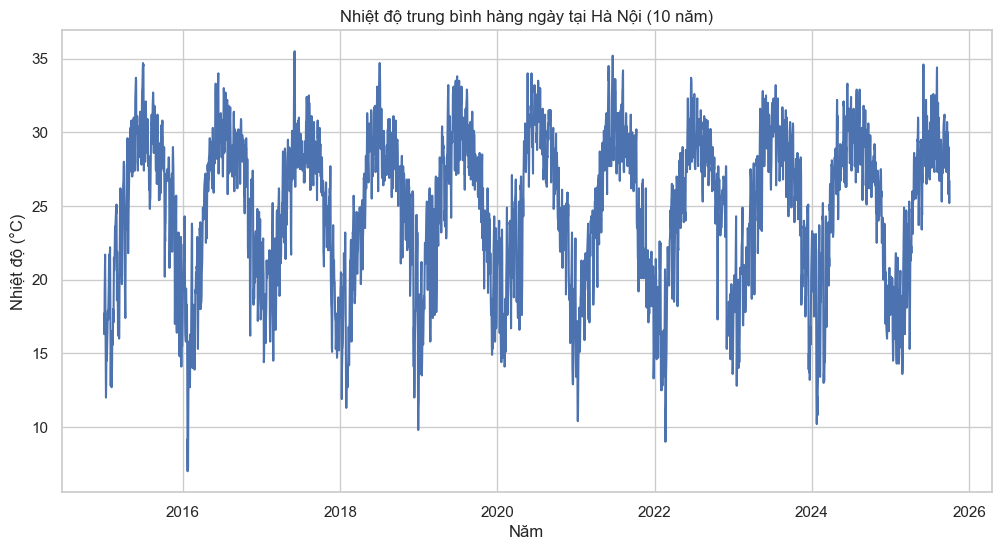

In [6]:
# Chuyển cột ngày
df_daily['datetime'] = pd.to_datetime(df_daily['datetime'], errors='coerce')

# Vẽ xu hướng nhiệt độ
plt.figure(figsize=(12,6))
plt.plot(df_daily['datetime'], df_daily['temp'])
plt.title('Nhiệt độ trung bình hàng ngày tại Hà Nội (10 năm)')
plt.xlabel('Năm')
plt.ylabel('Nhiệt độ (°C)')
plt.show()

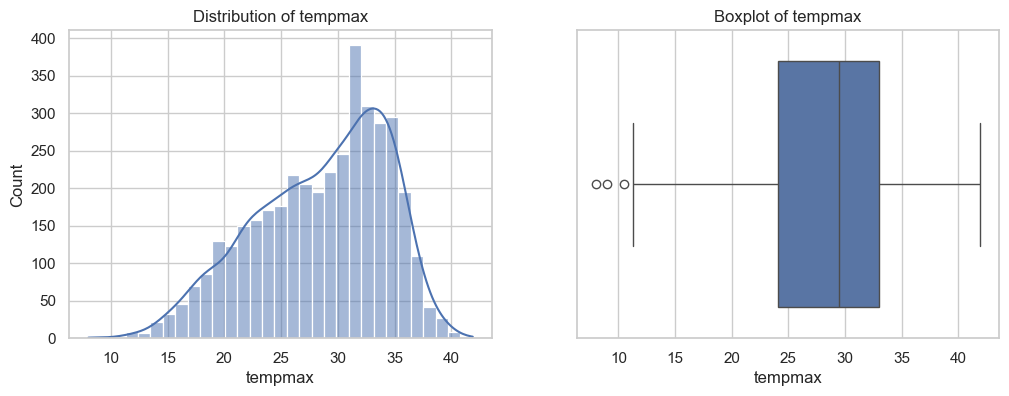

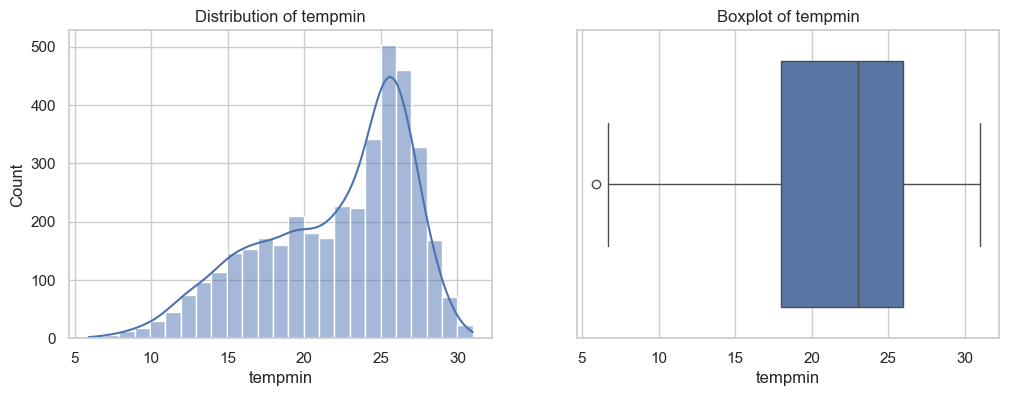

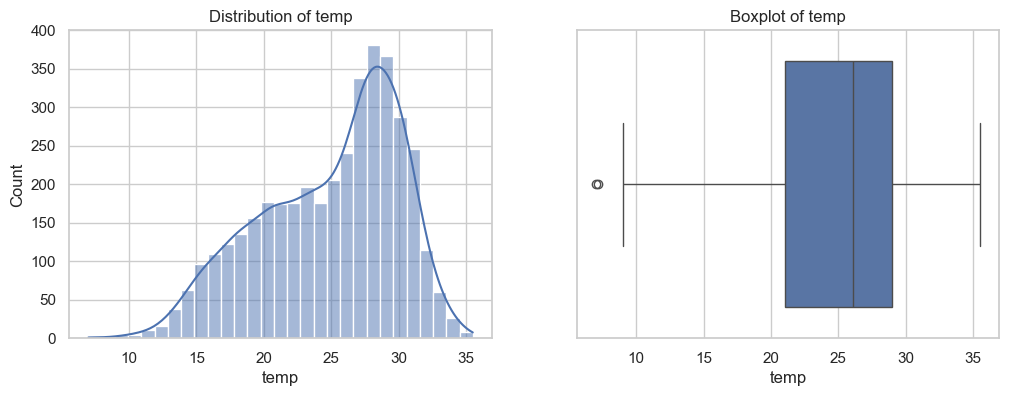

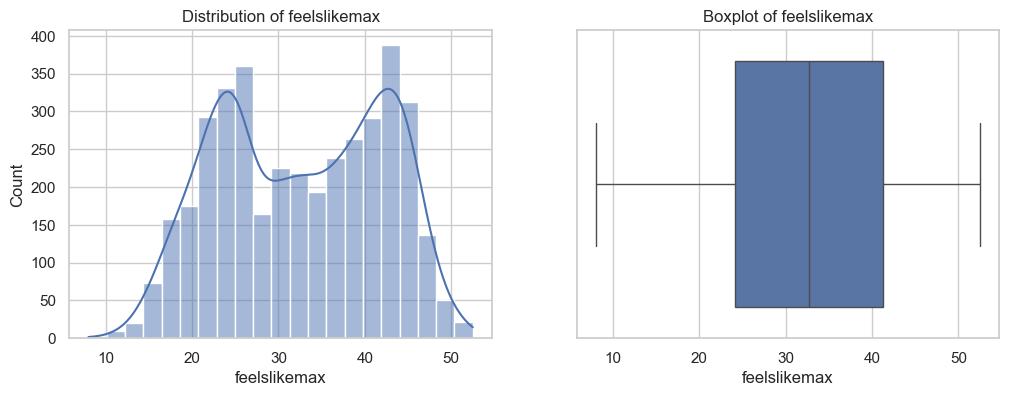

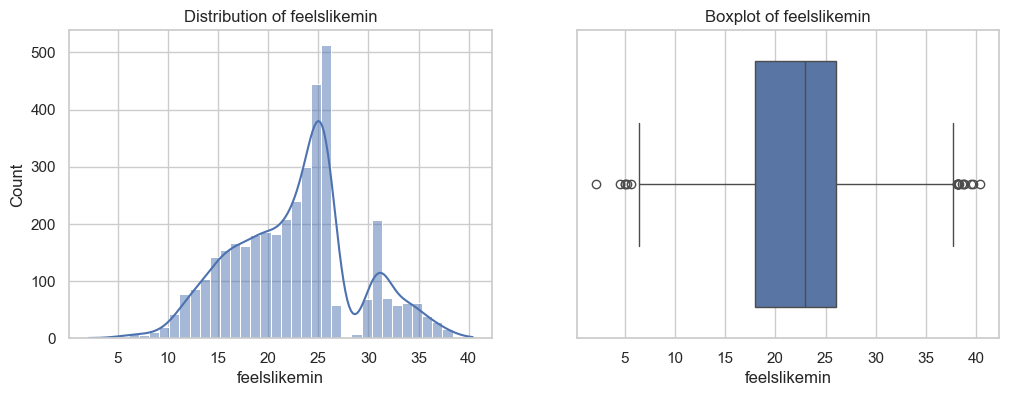

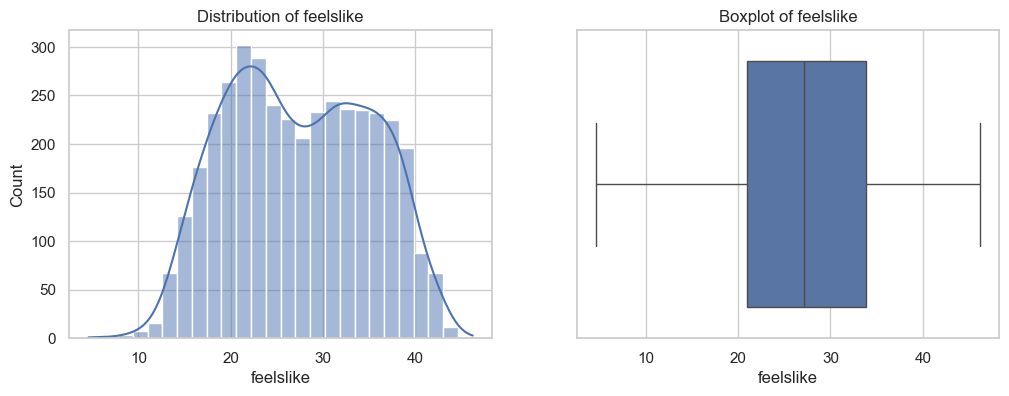

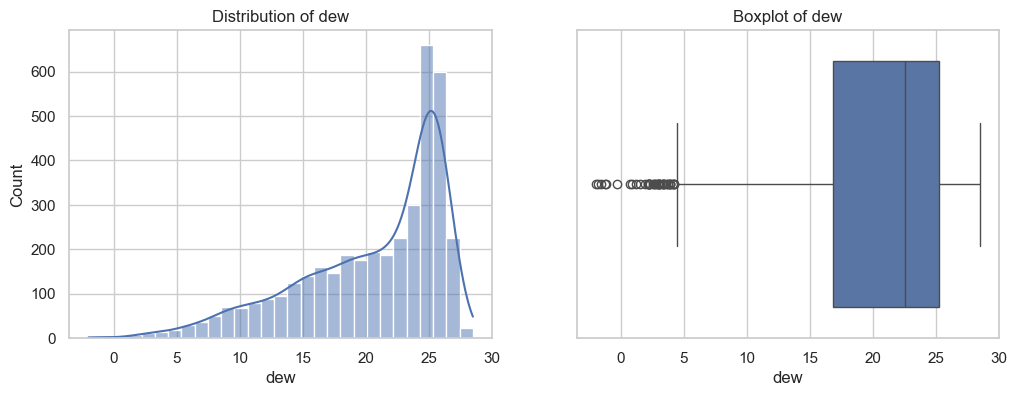

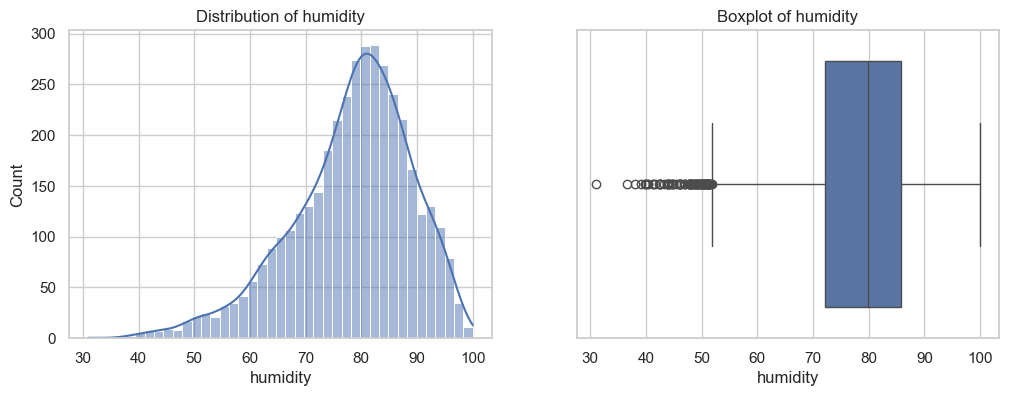

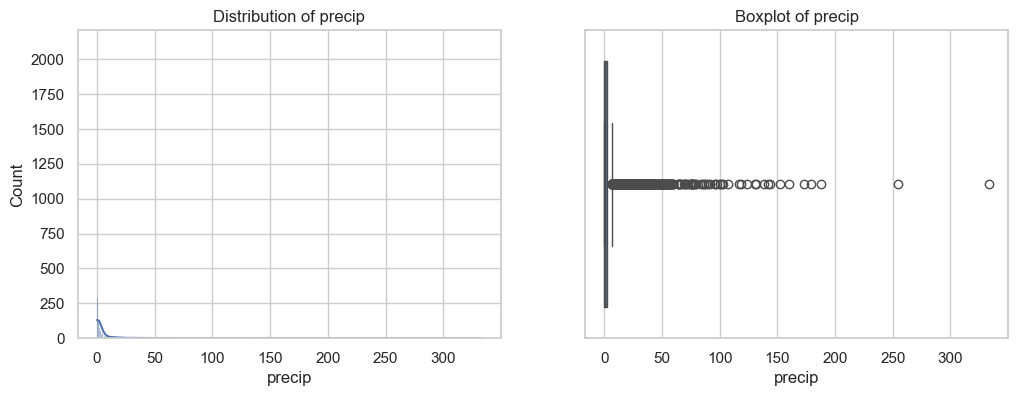

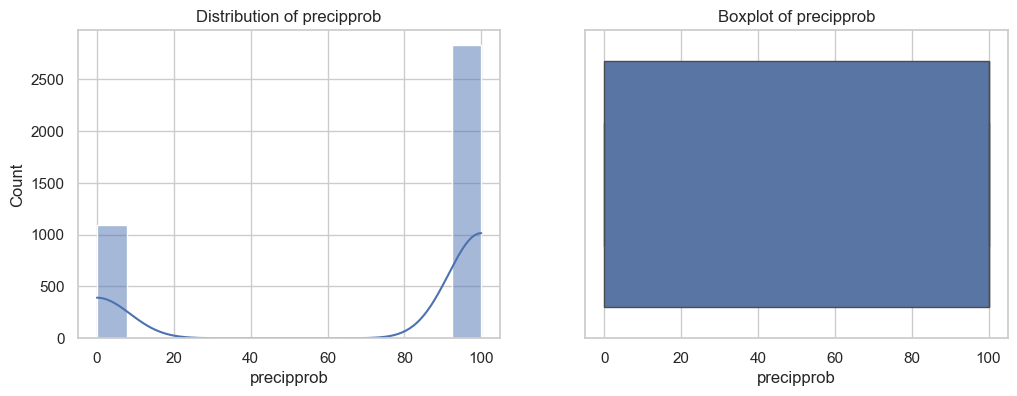

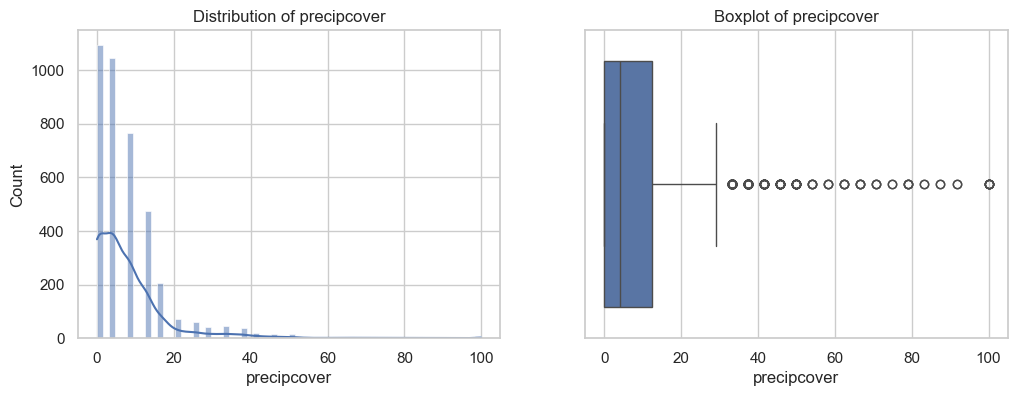

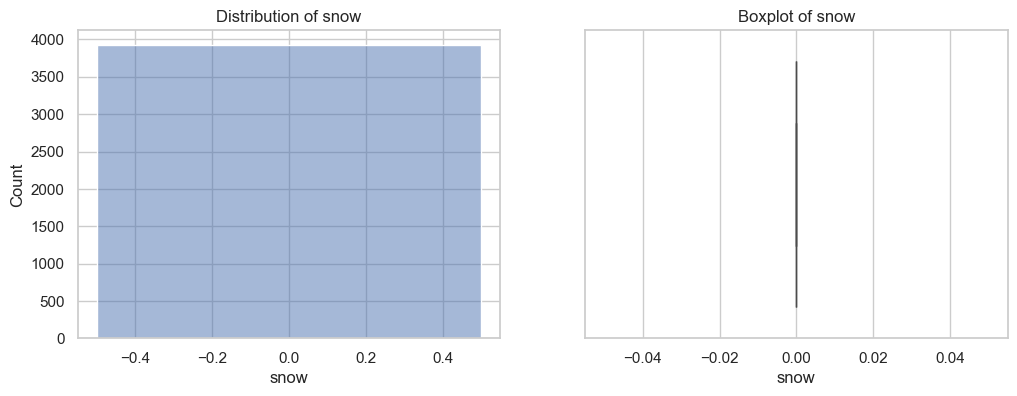

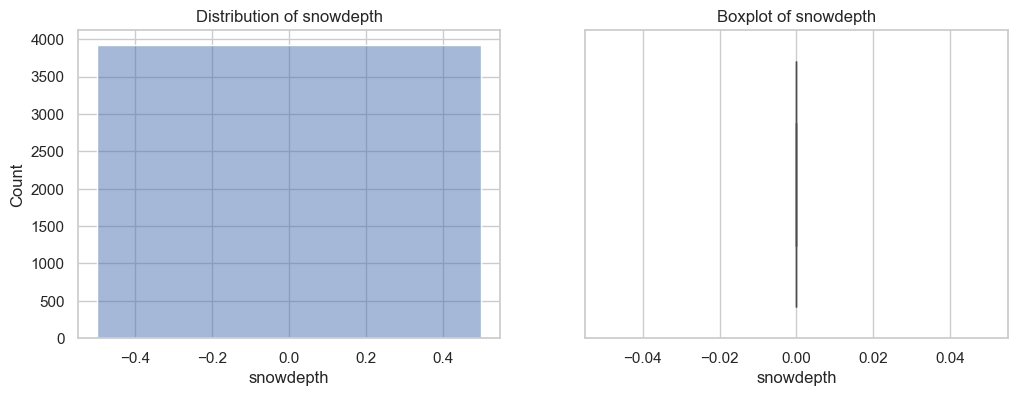

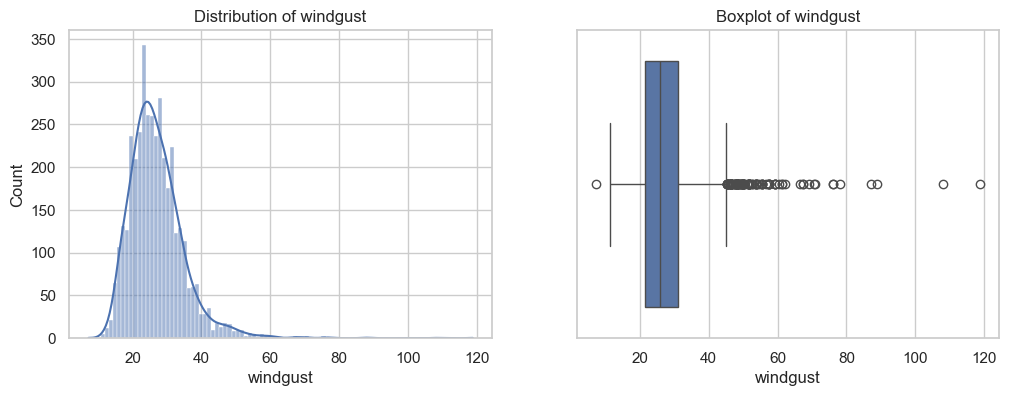

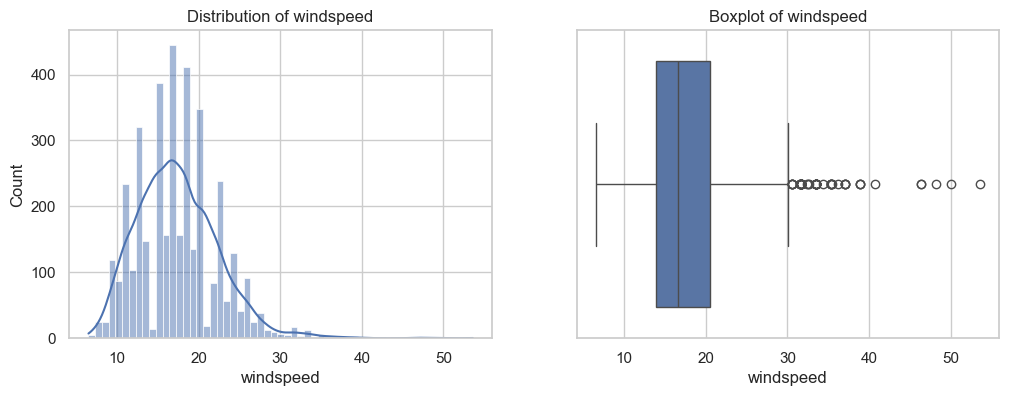

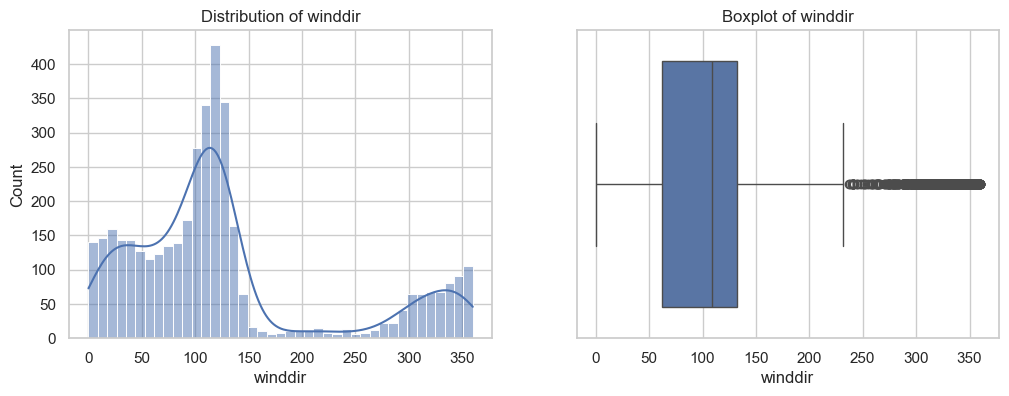

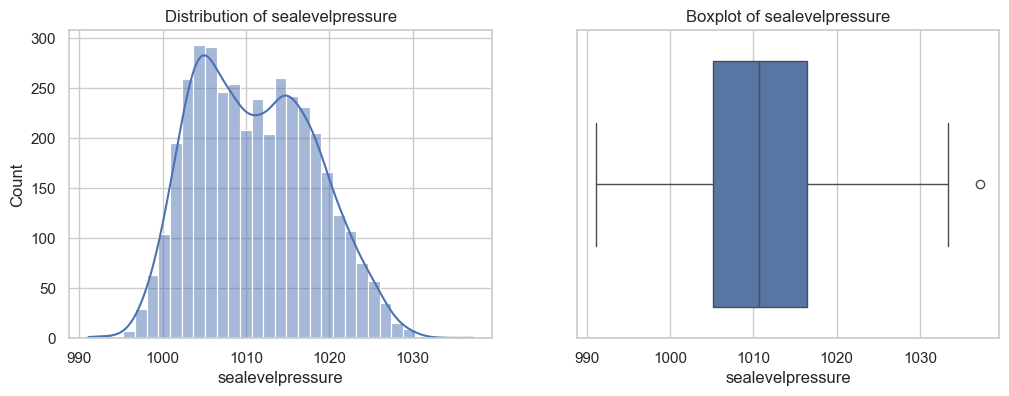

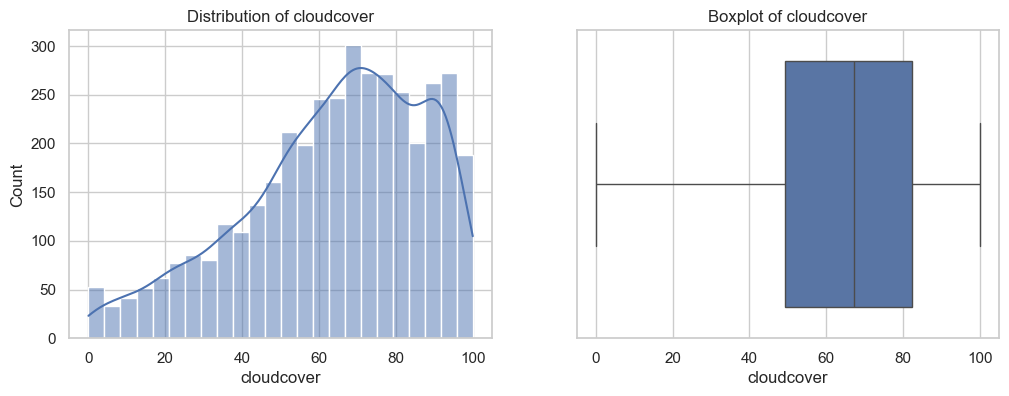

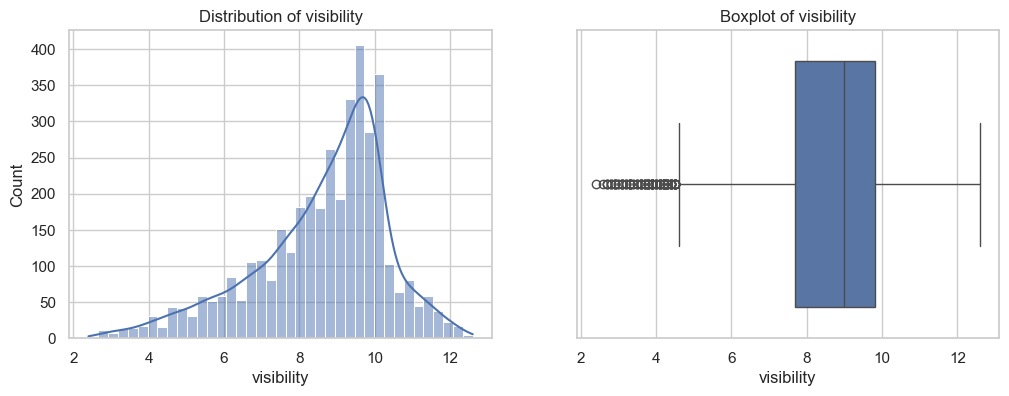

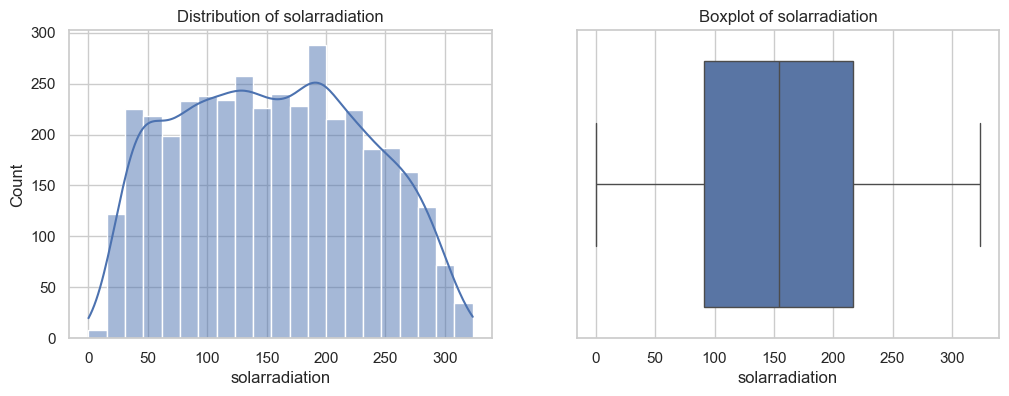

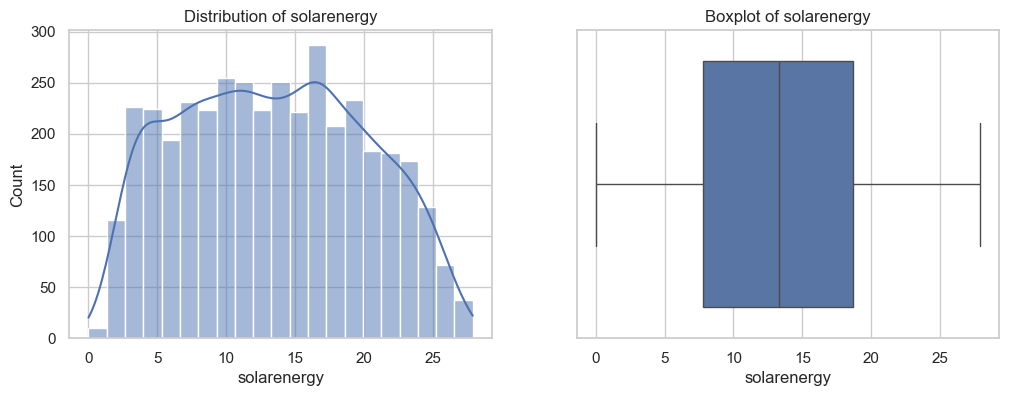

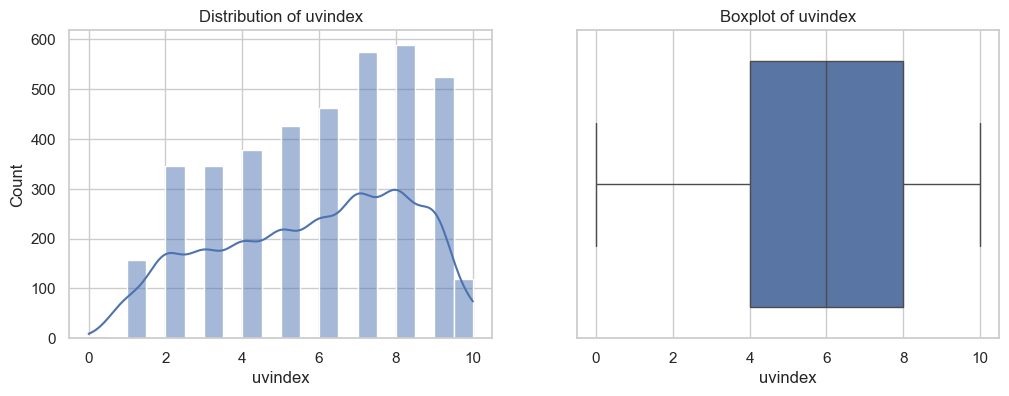

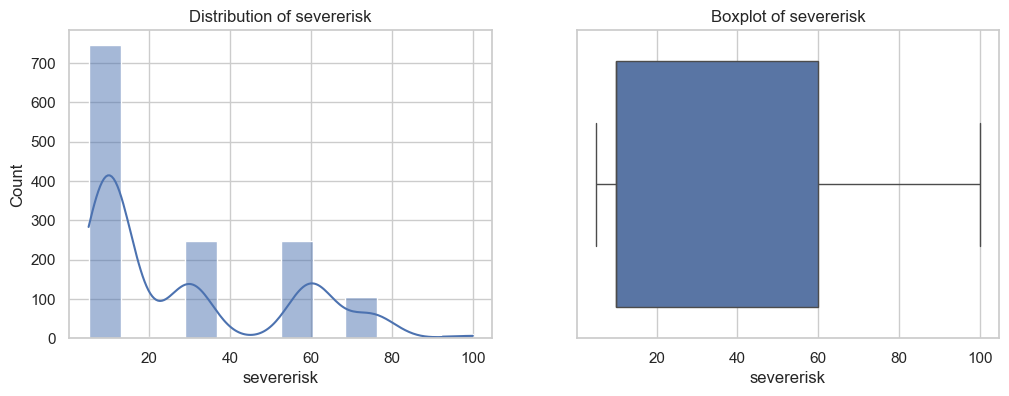

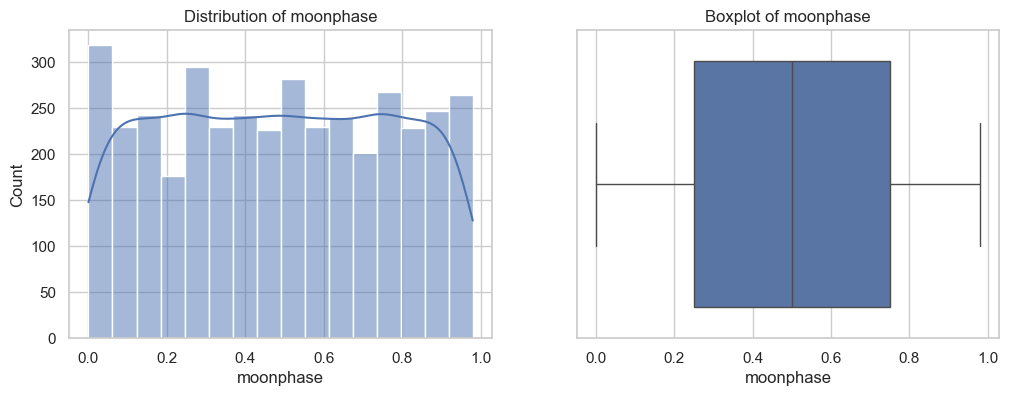

In [7]:
# Biểu đồ phân phối và boxplot
numeric_cols_d = df_daily.select_dtypes(include=[np.number]).columns
for col in numeric_cols_d:
    fig, axes = plt.subplots(1, 2, figsize=(12,4))
    sns.histplot(df_daily[col], kde=True, ax=axes[0])
    axes[0].set_title(f"Distribution of {col}")
    sns.boxplot(x=df_daily[col], ax=axes[1])
    axes[1].set_title(f"Boxplot of {col}")
    plt.show()

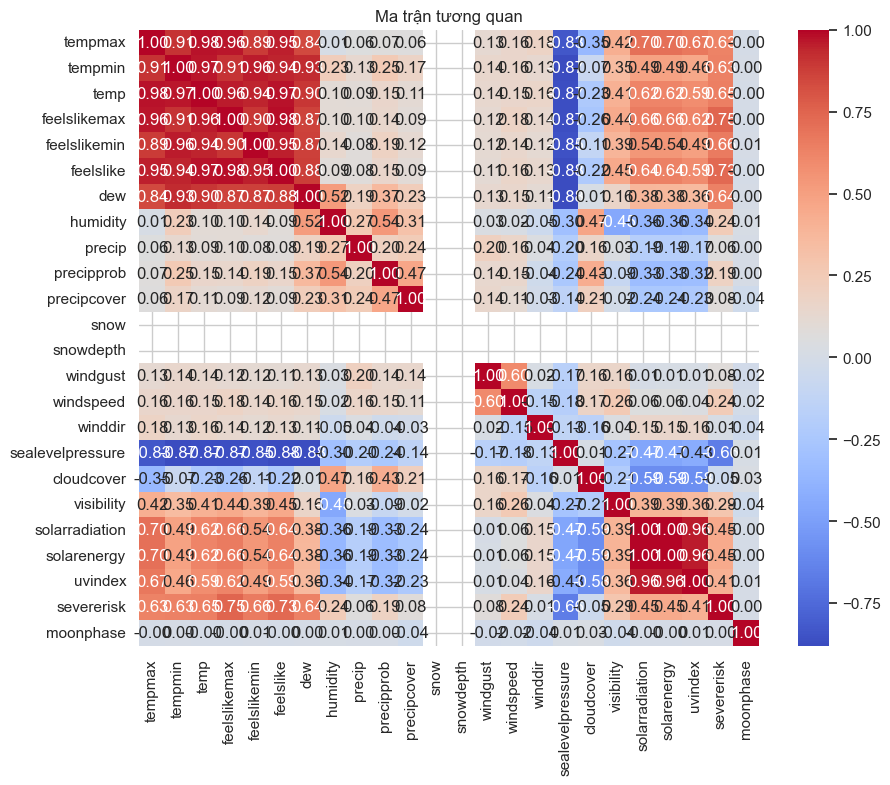

In [8]:
# Heatmap tương quan giữa các biến số
corr = df_daily.corr(numeric_only=True)
plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Ma trận tương quan")
plt.show()

# II. Data hourly

In [9]:
# Load the dataset
df_hourly = pd.read_excel(r"../data/raw/hanoi_hourly.xlsx")

# Hiển thị thông tin cơ bản
print("Kích thước dữ liệu:", df_hourly.shape)
display(df_hourly.head())

Kích thước dữ liệu: (94248, 24)


,name,datetime,temp,feelslike,dew,humidity,precip,precipprob,preciptype,snow,snowdepth,windgust,windspeed,winddir,sealevelpressure,cloudcover,visibility,solarradiation,solarenergy,uvindex,severerisk,conditions,icon,stations
0,Hanoi,2015-01-01T00:00:00,15.0,15.0,13.0,87.84,0.0,0,NaN,0.0,0.0,11.9,3.6,270.0,1023.0,0.0,3.5,0.0,0.0,0.0,NaN,Clear,clear-night,"48820099999,VVNB"
1,Hanoi,2015-01-01T01:00:00,15.8,15.8,13.0,83.33,0.0,0,NaN,0.0,0.0,11.2,6.4,314.0,1022.6,0.0,8.5,0.0,0.0,0.0,NaN,Clear,clear-night,"48820099999,48825099999,48831099999,VVNB"
2,Hanoi,2015-01-01T02:00:00,13.5,13.5,12.0,90.65,0.0,0,NaN,0.0,0.0,11.2,3.6,90.0,1022.0,0.0,3.0,0.0,0.0,0.0,NaN,Clear,clear-night,"48820099999,VVNB"
3,Hanoi,2015-01-01T03:00:00,13.0,13.0,12.0,93.65,0.0,0,NaN,0.0,0.0,11.2,1.8,329.2,1022.0,0.0,2.0,0.0,0.0,0.0,NaN,Clear,clear-night,VVNB
4,Hanoi,2015-01-01T04:00:00,14.7,14.7,12.5,86.57,0.0,0,NaN,0.0,0.0,10.8,9.2,352.0,1022.4,0.0,8.2,0.0,0.0,0.0,NaN,Clear,clear-night,"48820099999,48825099999,VVNB"


In [10]:
# Kiểm tra kiểu dữ liệu và thống kê mô tả
df_hourly.info()
display(df_hourly.describe(include='all'))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94248 entries, 0 to 94247
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              94248 non-null  object 
 1   datetime          94248 non-null  object 
 2   temp              94248 non-null  float64
 3   feelslike         94248 non-null  float64
 4   dew               94248 non-null  float64
 5   humidity          94248 non-null  float64
 6   precip            94209 non-null  float64
 7   precipprob        94248 non-null  int64  
 8   preciptype        12055 non-null  object 
 9   snow              94206 non-null  float64
 10  snowdepth         94206 non-null  float64
 11  windgust          94199 non-null  float64
 12  windspeed         94247 non-null  float64
 13  winddir           94246 non-null  float64
 14  sealevelpressure  94248 non-null  float64
 15  cloudcover        94248 non-null  float64
 16  visibility        94070 non-null  float6

,name,datetime,temp,feelslike,dew,humidity,precip,precipprob,preciptype,snow,snowdepth,windgust,windspeed,winddir,sealevelpressure,cloudcover,visibility,solarradiation,solarenergy,uvindex,severerisk,conditions,icon,stations
count,94248,94248,94248.000000,94248.000000,94248.000000,94248.000000,94209.000000,94248.000000,12055,94206.0,94206.0,94199.000000,94247.000000,94246.000000,94248.000000,94248.000000,94070.000000,94212.000000,94212.000000,94212.000000,32645.000000,94248,94248,94248
unique,1,94248,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,8,22
top,Hanoi,2015-01-01T00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,rain,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Partially cloudy,partly-cloudy-day,"48820099999,VVNB"
freq,94248,1,NaN,NaN,NaN,NaN,NaN,NaN,12055,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,52574,29371,61104
mean,NaN,NaN,24.896258,27.393700,20.485905,78.270513,0.217643,8.245268,NaN,0.0,0.0,17.380778,9.318116,142.613537,1011.082052,64.712259,8.599728,155.174609,0.558068,1.545100,17.062031,NaN,NaN,NaN
std,NaN,NaN,5.613481,8.500585,5.931406,15.748502,2.647468,27.505461,NaN,0.0,0.0,7.716193,4.824510,104.672241,7.315970,34.604449,2.848757,235.708445,0.849264,2.370613,15.945075,NaN,NaN,NaN
min,NaN,NaN,5.900000,2.100000,-8.000000,17.590000,0.000000,0.000000,NaN,0.0,0.0,1.100000,0.000000,0.000000,985.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,NaN,NaN,NaN
25%,NaN,NaN,21.000000,21.000000,17.000000,67.360000,0.000000,0.000000,NaN,0.0,0.0,11.500000,5.600000,65.000000,1005.000000,36.100000,7.000000,0.000000,0.000000,0.000000,10.000000,NaN,NaN,NaN
50%,NaN,NaN,25.900000,25.900000,22.400000,81.880000,0.000000,0.000000,NaN,0.0,0.0,16.600000,8.500000,115.000000,1010.900000,81.900000,10.000000,5.800000,0.000000,0.000000,10.000000,NaN,NaN,NaN
75%,NaN,NaN,29.000000,34.200000,25.000000,91.340000,0.000000,0.000000,NaN,0.0,0.0,22.000000,12.100000,185.000000,1016.800000,89.900000,10.000000,248.125000,0.900000,2.000000,15.000000,NaN,NaN,NaN
